In [5]:
import torchvision.transforms as transforms
from torchvision.utils import save_image
from torch.utils.data import DataLoader
from torch.autograd import Variable
import torch

import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2

from models import Generator
from datasets import *

%matplotlib inline

In [55]:
nc = 3
netG_A2B = Generator(nc, nc)
netG_B2A = Generator(nc, nc)

GanA2B_weights_file = './netG_A2B_21.pth'
GanB2A_weights_file = './netG_B2A_21.pth'
netG_A2B.load_state_dict(torch.load(GanA2B_weights_file, map_location='cpu'))
netG_B2A.load_state_dict(torch.load(GanB2A_weights_file, map_location='cpu'))

# Set model's test mode (i.e. no more gradients)
netG_A2B = netG_A2B.eval()
netG_B2A = netG_B2A.eval()

In [6]:
size = 256
transforms_ = transforms.Compose([  Rescale((size,size)),
                                    Normalize(),
                                    ToTensor() ])

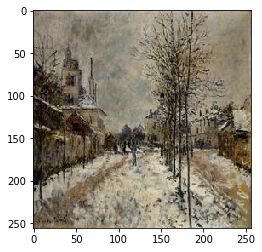

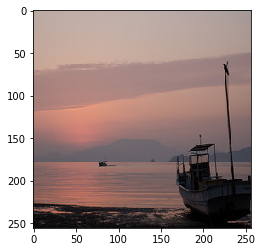

In [8]:
filesA = glob.glob('./datasets/monet2photo/test/A/*.*')
filesB = glob.glob('./datasets/monet2photo/test/B/*.*')

img = cv2.imread(filesA[0])
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

img2 = cv2.imread(filesB[0])
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

In [39]:
def convert(Gan, img, plot=False):
    img_tr = transforms_(img).to(torch.float32)
    out = Gan(img_tr.unsqueeze(0))
    # undo transformation
    out = (out.detach().numpy().squeeze().transpose(1,2,0)*0.5 + 0.5)*255.0
    out = out.astype(np.uint8)
    if plot:
        plt.figure(figsize=(12,5))
        plt.subplot(1,2,1)
        plt.imshow(cv2.cvtColor(img.squeeze(), cv2.COLOR_BGR2RGB))
        plt.subplot(1,2,2)
        plt.imshow(cv2.cvtColor(out.squeeze(), cv2.COLOR_BGR2RGB))
        plt.show()
    return out

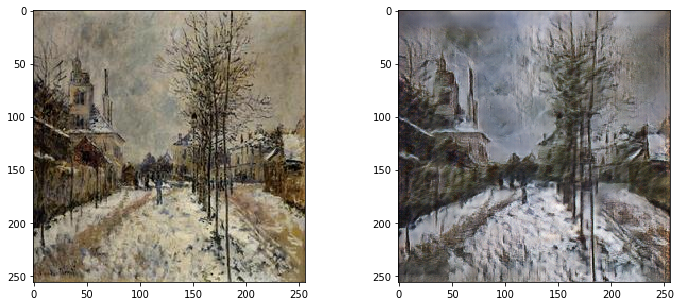

In [57]:
img = cv2.imread(filesA[0])
img2 = cv2.imread(filesB[0])
imgA2B = convert(netG_A2B, img, plot=True)
imgB2A = convert(netG_B2A, img2, plot=True)

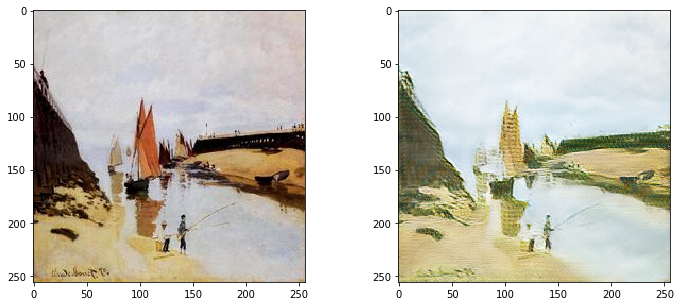

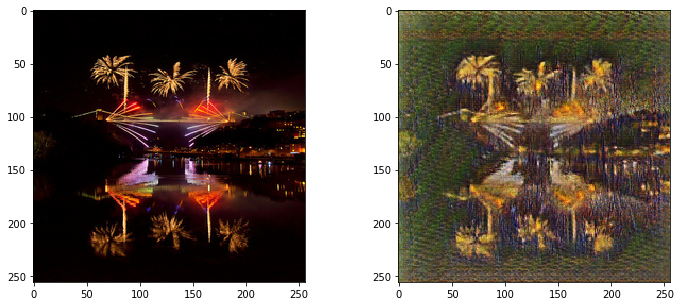

In [50]:
idxA = np.random.randint(0,len(filesA))
idxB = np.random.randint(0,len(filesB))
img = cv2.imread(filesA[idxA])
img2 = cv2.imread(filesB[idxB])

imgA2B = convert(netG_A2B, img, plot=True)
imgB2A = convert(netG_B2A, img2, plot=True)

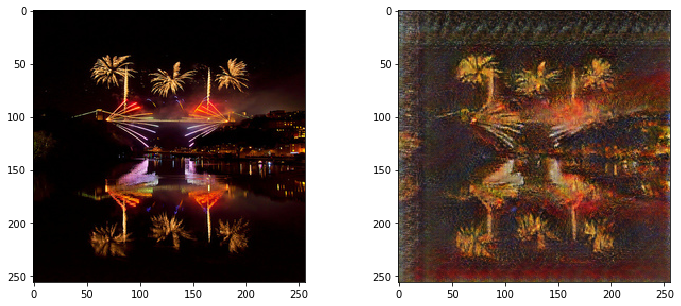

In [58]:
img = cv2.imread(filesA[idxA])
img2 = cv2.imread(filesB[idxB])

imgA2B = convert(netG_A2B, img, plot=True)
imgB2A = convert(netG_B2A, img2, plot=True)

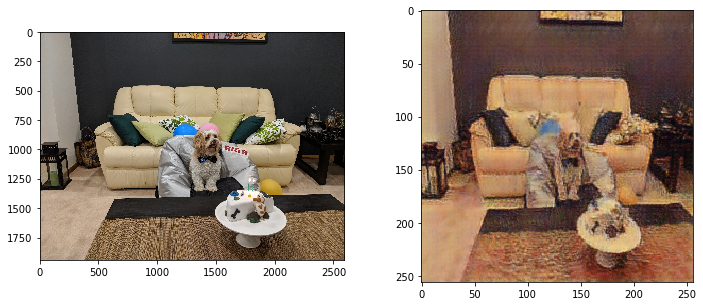

In [59]:
img = cv2.imread('./simba.jpg')
imgB2A = convert(netG_B2A, img, plot=True)

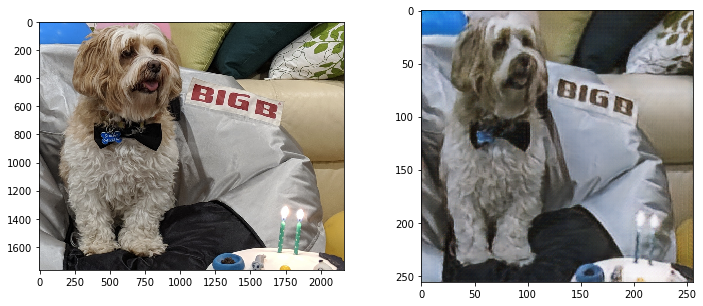

In [63]:
img = cv2.imread('./simba2.png')
imgB2A = convert(netG_B2A, img, plot=True)
imgA2B = convert(netG_A2B, img, plot=True)

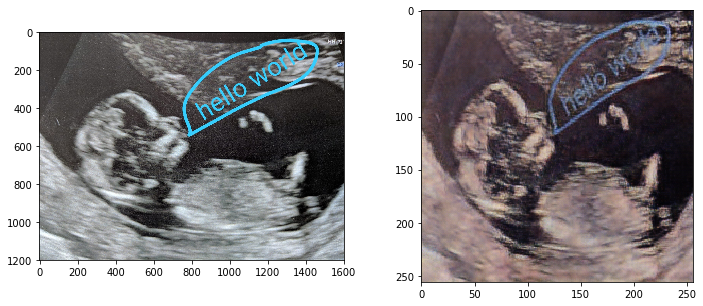

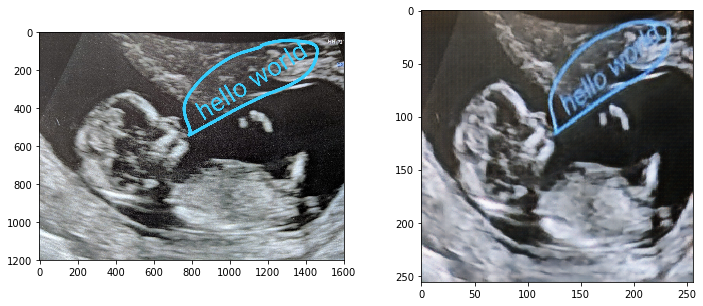

In [64]:
img = cv2.imread('./baby.jpeg')
imgB2A = convert(netG_B2A, img, plot=True)
imgA2B = convert(netG_A2B, img, plot=True)